# Assignment-3 RNN (LSTM-Time Series)

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [61]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [62]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [64]:
df.columns = ['Production']

In [65]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


<AxesSubplot:xlabel='DATE'>

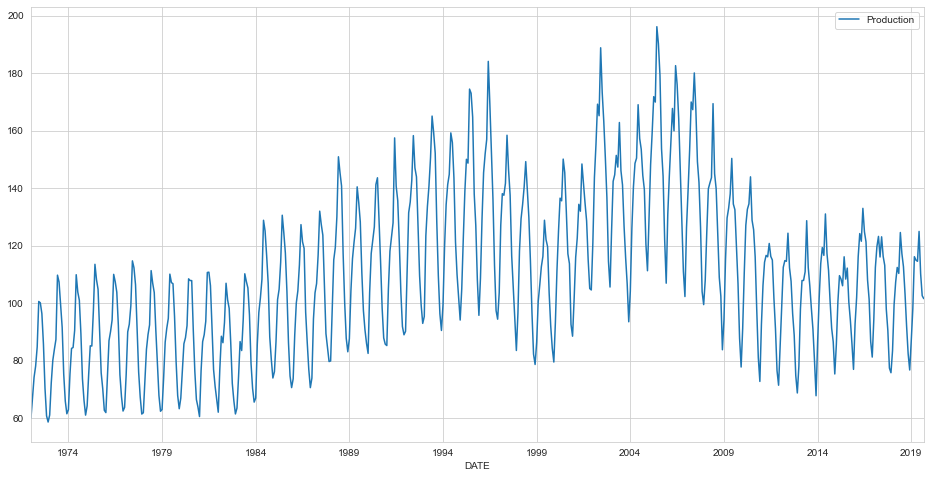

In [66]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [67]:
test_size = 20

In [68]:
test_ind = len(df)- test_size

In [69]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [73]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [74]:
# help(TimeseriesGenerator)

In [75]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [76]:
X, y = generator[0]

In [77]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [78]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

## Modelling

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
n_features = 1

### with "tanh" activation function

In [81]:
model1 = Sequential()
model1.add(LSTM(150, activation = 'tanh', input_shape = (length, n_features)))
model1.add(Dense(1))
model1.compile(optimizer = 'adam', loss = 'mse')

In [82]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               91200     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [83]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [84]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [85]:
model1.fit_generator(generator, epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
541/541 [==============================] - 8s 9ms/step - loss: 0.0182 - val_loss: 0.0031
Epoch 2/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0045 - val_loss: 0.0025
Epoch 3/30
541/541 [==============================] - 4s 8ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 4/30
541/541 [==============================] - 6s 10ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 5/30
541/541 [==============================] - 5s 9ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 6/30
541/541 [==============================] - 5s 9ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 7/30
541/541 [==============================] - 5s 9ms/step - loss: 0.0032 - val_loss: 0.0032


<AxesSubplot:>

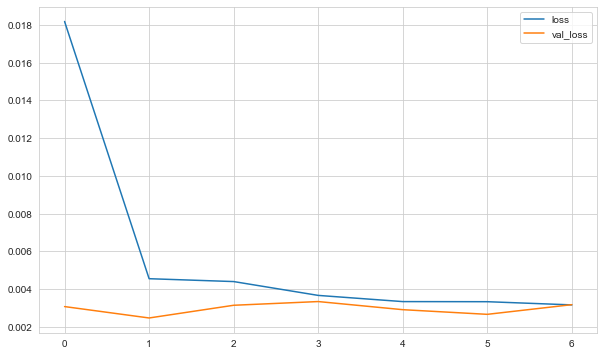

In [86]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [87]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model1.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [88]:
true_predictions = scaler.inverse_transform(test_predictions)

In [89]:
test['Predictions'] = true_predictions

In [90]:
test

,Production,Predictions
DATE,,
2018-02-01,99.490,93.039
2018-03-01,107.315,101.588
2018-04-01,112.431,108.716
2018-05-01,110.354,113.739
2018-06-01,124.584,116.371
2018-07-01,117.222,115.134
2018-08-01,112.678,109.889
2018-09-01,103.312,100.670
2018-10-01,92.132,90.286


<AxesSubplot:xlabel='DATE'>

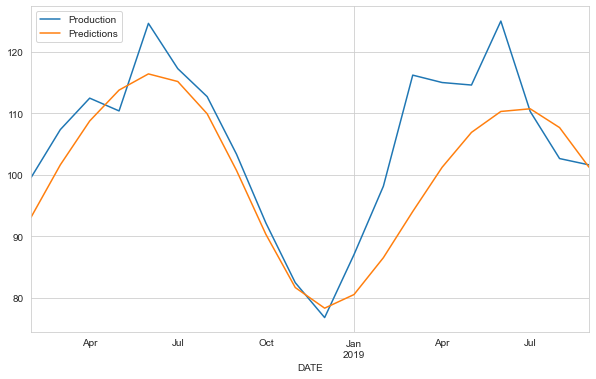

In [91]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [94]:
eval_metrics(test['Production'], test['Predictions'])

r2_score: 0.5919240297232323 
mae: 6.073848389656324 
mse: 67.60103117058365 
rmse: 8.221984624808274


### with "relu" activation function

In [95]:
model2 = Sequential()
model2.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [96]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 150)               91200     
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [97]:
model2.fit_generator(generator, epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
541/541 [==============================] - 5s 7ms/step - loss: 0.0190 - val_loss: 0.0089
Epoch 2/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 3/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 4/30
541/541 [==============================] - 3s 6ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 5/30
541/541 [==============================] - 3s 6ms/step - loss: 0.0042 - val_loss: 0.0059
Epoch 6/30
541/541 [==============================] - 3s 6ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 7/30
541/541 [==============================] - 4s 8ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 8/30
541/541 [==============================] - 4s 8ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 10/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0034

<AxesSubplot:>

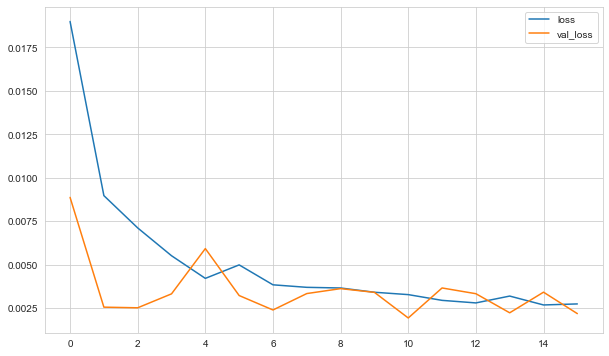

In [98]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [99]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model2.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [100]:
true_predictions = scaler.inverse_transform(test_predictions)

In [101]:
test['Predictions'] = true_predictions

In [102]:
test

,Production,Predictions
DATE,,
2018-02-01,99.490,100.475
2018-03-01,107.315,111.089
2018-04-01,112.431,118.255
2018-05-01,110.354,122.491
2018-06-01,124.584,124.986
2018-07-01,117.222,122.312
2018-08-01,112.678,114.137
2018-09-01,103.312,101.282
2018-10-01,92.132,89.389


<AxesSubplot:xlabel='DATE'>

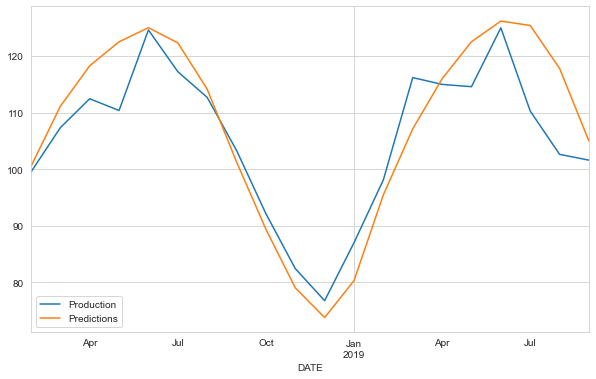

In [103]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [104]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [105]:
eval_metrics(test['Production'], test['Predictions'])

r2_score: 0.7203733412163368 
mae: 5.151412510198355 
mse: 46.32238076586582 
rmse: 6.8060547136991065


## Retrain and Forecasting

In [106]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [107]:
length = 20 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [108]:
model = Sequential()
model.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=8)

Epoch 1/8
553/553 [==============================] - 6s 9ms/step - loss: 0.0280
Epoch 2/8
553/553 [==============================] - 5s 9ms/step - loss: 0.0123
Epoch 3/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0045
Epoch 4/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0037
Epoch 5/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0034
Epoch 6/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0030
Epoch 7/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0030
Epoch 8/8
553/553 [==============================] - 4s 8ms/step - loss: 0.0030


In [109]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 36

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [110]:
forecast = scaler.inverse_transform(forecast)

In [111]:
forecast

array([[ 87.62269702],
       [ 80.16905109],
       [ 80.2452352 ],
       [ 89.21225634],
       [100.87923679],
       [110.27106033],
       [116.4344102 ],
       [119.82308792],
       [119.3950848 ],
       [114.64050681],
       [105.53565388],
       [ 93.24232195],
       [ 81.04346455],
       [ 73.55612909],
       [ 75.59870305],
       [ 86.32440531],
       [ 98.64880185],
       [108.366812  ],
       [114.86705716],
       [119.10214716],
       [119.1489203 ],
       [114.75763023],
       [105.93277682],
       [ 93.58623752],
       [ 80.69488519],
       [ 71.89738954],
       [ 72.65280054],
       [ 83.25219934],
       [ 96.04501374],
       [106.40313518],
       [113.35238692],
       [118.0489667 ],
       [118.72888414],
       [115.21721024],
       [107.18552486],
       [ 95.34274453]])

In [112]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [113]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [114]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [115]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [116]:
forecast_df

,Forecast
2019-10-01,87.623
2019-11-01,80.169
2019-12-01,80.245
2020-01-01,89.212
2020-02-01,100.879
2020-03-01,110.271
2020-04-01,116.434
2020-05-01,119.823
2020-06-01,119.395
2020-07-01,114.641


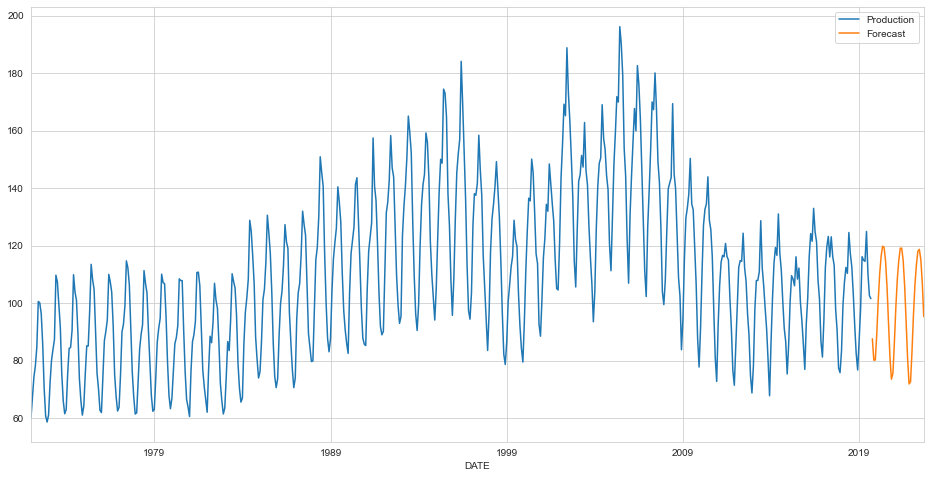

In [117]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

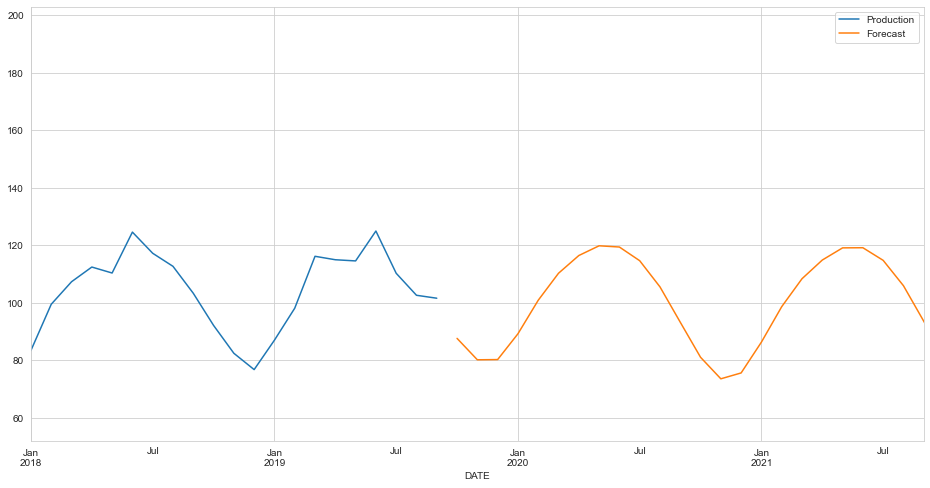

In [118]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')